In [83]:
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
import time

Решим задачу из расчета, что коммивояжеру необходимо посетить 4 и более городов, чтобы оценить увеличение вычислительной сложности задачи. Заполним карту растояний случайными числами

In [88]:
# Установка начального состояния генератора случайных чисел для воспроизводимости
np.random.seed(42)

# Определение размеров матрицы и создание случайной матрицы расстояний
city_count = 10
n = [x for x in range(4, city_count + 1)]
O_time = []
# Генерация матрицы расстояний от 1 до 19
road_map = np.random.randint(1, 20, size=(city_count, city_count))

# Обеспечиваем, чтобы диагональ была нулевой (расстояние от города к самому себе)
np.fill_diagonal(road_map, 0)

print(road_map)

[[ 0 15 11  8  7 19 11 11  4  8]
 [ 3  0 12  6  2  1 12 12 17 10]
 [16 15  0 19 12  3  5 19  7  9]
 [ 7 18  4  0 18  9  2 15  7 12]
 [ 8 15  3 14  0  4 18  8  4  2]
 [ 6 10  4 18 12  0 10  4 14 16]
 [15  8 14  8 16 13  0 15 13  9]
 [15 13  1  7  9  1 12  0 11 19]
 [17  8  3  3  1  5 10  7  0  7]
 [ 9  8 12  2  1 16  5  3 12  0]]


In [57]:
#Функция, которая вычисляет длину дороги по заданному маршруту и карте
def calculate_distance(route, distance_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i], route[i + 1]]
    # добавляем расстояние обратно в стартовый город
    total_distance += distance_matrix[route[-1]][route[0]]
    return total_distance

In [84]:
#Функция, которая ищет самый короткий маршрут по карте и количеству городов
def traveling_salesman(distance_matrix, n):
    shortest_route = None
    min_distance = 100

    # Генерируем все возможные маршруты
    for perm in permutations(range(n)):
        #print("Perm: ", perm)
        current_distance = calculate_distance(perm, distance_matrix)
        if current_distance < min_distance:
            min_distance = current_distance
            shortest_route = perm

    return shortest_route, min_distance

In [89]:
#Вывод информации о маршрутах
for i in n:
  start = time.time()
  route, distance = traveling_salesman(road_map, i)
  finish = time.time()
  execution_time = finish - start
  O_time.append(execution_time)
  print("При количестве городов:", i)
  print("Кратчайший маршрут:", route)
  print("Минимальное расстояние:", distance)
  print("Время выполнения:", finish - start)
  print("-------------------------")

При количестве городов: 4
Кратчайший маршрут: (0, 3, 2, 1)
Минимальное расстояние: 30
Время выполнения: 9.584426879882812e-05
-------------------------
При количестве городов: 5
Кратчайший маршрут: (0, 3, 2, 1, 4)
Минимальное расстояние: 37
Время выполнения: 0.0003521442413330078
-------------------------
При количестве городов: 6
Кратчайший маршрут: (0, 3, 2, 5, 1, 4)
Минимальное расстояние: 35
Время выполнения: 0.0024547576904296875
-------------------------
При количестве городов: 7
Кратчайший маршрут: (0, 3, 6, 1, 4, 2, 5)
Минимальное расстояние: 32
Время выполнения: 0.013648748397827148
-------------------------
При количестве городов: 8
Кратчайший маршрут: (0, 4, 2, 5, 7, 3, 6, 1)
Минимальное расстояние: 37
Время выполнения: 0.11037158966064453
-------------------------
При количестве городов: 9
Кратчайший маршрут: (0, 8, 4, 2, 5, 7, 3, 6, 1)
Минимальное расстояние: 35
Время выполнения: 1.2558622360229492
-------------------------
При количестве городов: 10
Кратчайший маршрут: (0

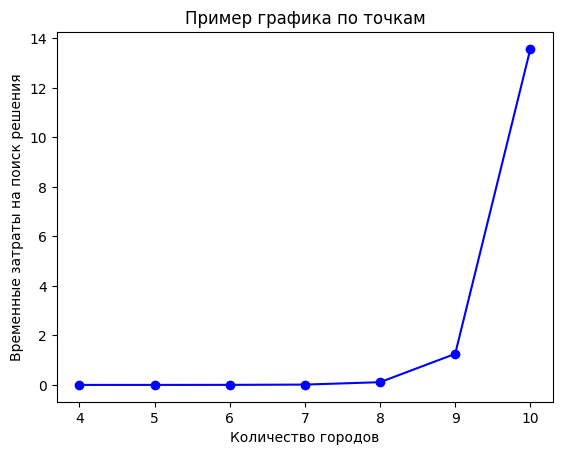

In [91]:
# Построение графика
plt.plot(n, O_time, marker='o', color='b')  # 'o' - маркер точек
plt.title('Пример графика по точкам')
plt.xlabel('Количество городов')
plt.ylabel('Временные затраты на поиск решения')

plt.show()

Как видно из графика, время на поиск решения задачи растет экспоненциально
